# Calculations - degrader foil thicknesses

In [1]:
%run SRIM_Ca48.ipynb
%run SRIM_U225.ipynb

Max energy= 336000000.0
SRIM calculations of Ca-48 successful for the following target materials: ['Al', 'Ti', 'Graphite', 'PbS', 'Hf', 'Pu']

	Calculate energy loss as a function of traversed target material with function 'e_loss_x(E_init, x, target)'

	Calculate traversed target material as a function of energy loss 'x_loss_e(E_init, E_after, target)'
Max energy= 1575000000.0
SRIM calculations of U-225 successful for the following target materials: ['Hf']

	Calculate energy loss as a function of traversed target material with function 'e_loss_x_U225(E_init, x, target)'

	Calculate traversed target material as a function of energy loss 'x_loss_e_U225(E_init, E_after, target)'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg
from matplotlib import colors
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'];
#Customising style
#mpl.rc('lines', linewidth=2, color='r')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['font.size'] = 24
#mpl.rcParams['savefig.format'] = "eps"
#mpl.rcParams['savefig.dpi'] = 100
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['figure.figsize'] = (16,9)

## Initialise general parameters

In [3]:
e_tank1 = 4.774 #MeV/u
e_tank2 = 5.893 #MeV/u
A_beam = 48

## Hf for shortlived alpha-decaying nuclei

Ca-48 on Hf-nat.

Beam energies at middle of target should be aimed for: 

* 4.2 MeV/u

This is according to Andrew's calculations (got them from Dirk)

In [4]:
e_tank = e_tank1
target = "Hf"
degrader = "Al"
backing = "Ti"

In [5]:
degrader_thickness = 0.76 # mg/cm2
degrader_thickness = 1e4*(degrader_thickness / 2.70e3) #µm
print(degrader_thickness)
degrader_thickness = 0*2 #µm

backing_thickness = 0.82 # mg/cm2 (according to Dirk)
backing_thickness = 1e4*(backing_thickness/4.506e3) # µm
backing_thickness = 2.25 # µm

target_thickness = 0.83 #mg/cm2 (correspondence with Bettina Lommel)
target_thickness = 1e4*(target_thickness/13.31e3) # µm

2.8148148148148144


### Traversing material and calculating energy

In [6]:
E_of_X = [] #energies
X = [] # distance
E = e_tank*A_beam
E_of_X.append(E)
X.append(0)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# degrader
E = E - e_loss_x(E, degrader_thickness, degrader)
E_of_X.append(E)
X.append(X[-1]+degrader_thickness)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# backing
E = E - e_loss_x(E, backing_thickness, backing)
E_of_X.append(E)
X.append(X[-1]+backing_thickness)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

# target, middle and end
E = E - e_loss_x(E, target_thickness*0.5, target)
E_of_X.append(E)
X.append(X[-1]+target_thickness*0.5)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')
E = E - e_loss_x(E, target_thickness*0.5, target)
E_of_X.append(E)
X.append(X[-1]+target_thickness*0.5)
print("E("+str(X[-1])+" µm)=", E_of_X[-1], 'MeV', E_of_X[-1]/A, 'MeV/u')

E_of_X = np.asarray(E_of_X)
X = np.asarray(X)

E(0 µm)= 229.152 MeV 1.0184533333333332 MeV/u
E(0 µm)= 229.1519999926598 MeV 1.0184533333007102 MeV/u
E(2.25 µm)= 214.60005408808604 MeV 0.9537780181692713 MeV/u
E(2.561795642374155 µm)= 211.1104637203194 MeV 0.938268727645864 MeV/u
E(2.8735912847483096 µm)= 207.60407232744853 MeV 0.9226847658997712 MeV/u


In [7]:
stop_labels = ['start_degrader', 'start_backing', 'start_target', 'middle_target', 'end_target']

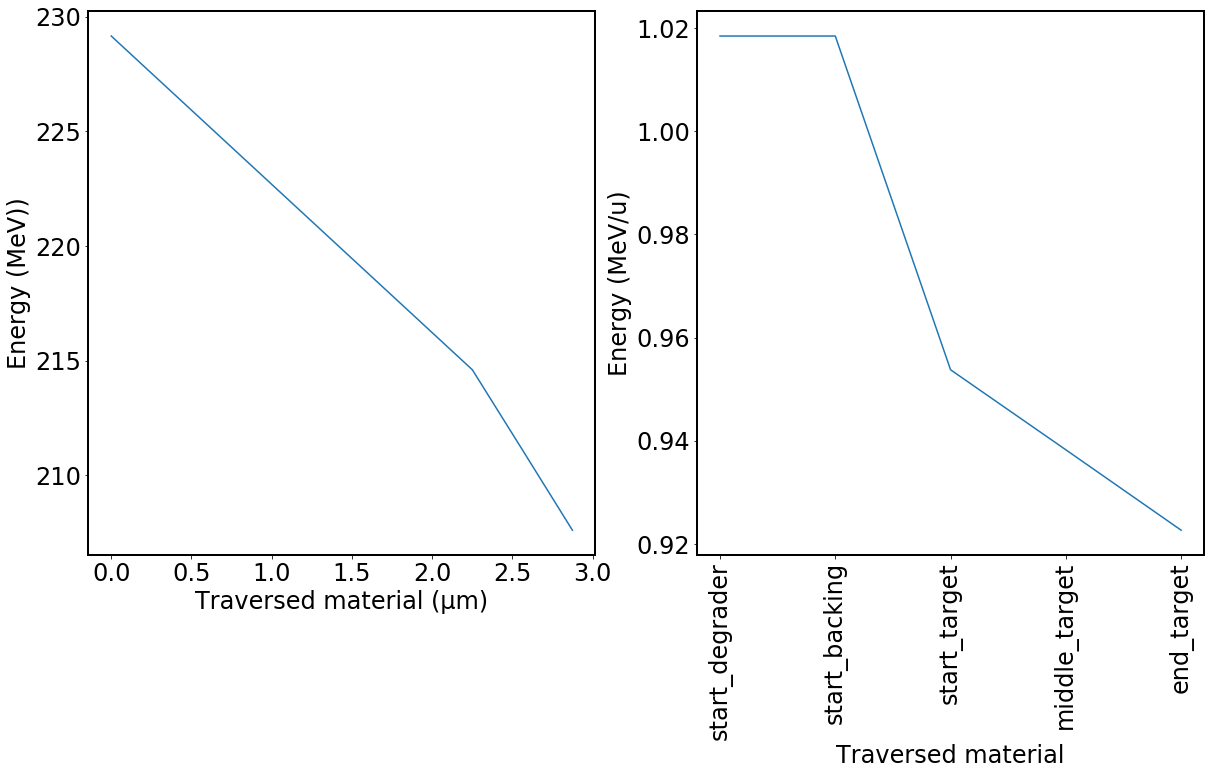

In [8]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(X, E_of_X, label='E(X)')
axes[0].set_xlabel("Traversed material (µm)")
axes[0].set_ylabel('Energy (MeV))')
axes[1].plot(stop_labels, E_of_X/A, label='E(X)')
plt.xticks(rotation=90)
axes[1].set_xlabel("Traversed material")
axes[1].set_ylabel('Energy (MeV/u)')
plt.show()

# Fusion: U-228 excitation and kinetic energies

In [9]:
from pyne import data as pyne_data

/home/anton/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


In [10]:
A_compound = 228
masses = {"Ca48": pyne_data.atomic_mass("Ca48"), "Hf180": pyne_data.atomic_mass("Hf180"), "U228": pyne_data.atomic_mass("U228")}
for m in masses:
    masses[m] *= 931.494 #MeV/c^2
masses

{'Ca48': 44667.48724046091,
 'Hf180': 167619.13820528076,
 'U228': 212409.85435656906}

Looping target

In [11]:
ind_start = 2
E_compound, E_exc = [], []

for i in range(ind_start, len(E_of_X)):
    E_beam = E_of_X[i]
    E_kin_compound =  E_beam * (A_beam/A_compound)
    excitation_energy = masses["Ca48"] + masses["Hf180"] - masses["U228"] + E_beam - E_kin_compound    
    E_compound.append(E_kin_compound)
    E_exc.append(excitation_energy)

print("Fusion at: ", stop_labels[ind_start:])
print("Compound kinetic energy: ", E_compound)
print("Compound excitation energy: ", E_exc)

Fusion at:  ['start_target', 'middle_target', 'end_target']
Compound kinetic energy:  [45.17895875538653, 44.44430815164618, 43.70612048998916]
Compound excitation energy:  [46.19218450530144, 43.43724474127514, 40.66904101006131]
